In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
from scipy.stats import ttest_ind

In [3]:
df = pd.read_csv('D:/Analytics/Full Projects/food_company/ifood_df.csv')
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

# Fase 1: Limpieza y Preparación de Datos (EDA)

In [15]:
df[["Income", "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntSweetProducts", "MntFishProducts", "MntGoldProds", "MntTotal", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Age", "Customer_Days"]].describe().round(2)

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntSweetProducts,MntFishProducts,MntGoldProds,MntTotal,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Customer_Days
count,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00
mean,51622.09,49.01,306.16,26.40,165.31,27.13,37.76,44.06,562.76,2.32,4.10,2.65,5.82,5.34,51.10,2512.72
std,20713.06,28.93,337.49,39.78,217.78,41.13,54.82,51.74,575.94,1.89,2.74,2.80,3.24,2.41,11.71,202.56
min,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,24.00,2159.00
25%,35196.00,24.00,24.00,2.00,16.00,1.00,3.00,9.00,56.00,1.00,2.00,0.00,3.00,3.00,43.00,2339.00
50%,51287.00,49.00,178.00,8.00,68.00,8.00,12.00,25.00,343.00,2.00,4.00,2.00,5.00,6.00,50.00,2515.00
75%,68281.00,74.00,507.00,33.00,232.00,34.00,50.00,56.00,964.00,3.00,6.00,4.00,8.00,7.00,61.00,2688.00
max,113734.00,99.00,1493.00,199.00,1725.00,262.00,259.00,321.00,2491.00,15.00,27.00,28.00,13.00,20.00,80.00,2858.00


In [11]:
cols = ["Income", "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntSweetProducts", "MntFishProducts", "MntGoldProds", "MntTotal", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Age", "Customer_Days"]
resultados = {}

for variable in cols:
        #Medianas y medias
        key = f'MEDIANA: {variable}'      
        key2 = f'Media: {variable}'
        
        resultados[key] = (df[variable].median())
        resultados[key2] = (df[variable].mean().round(2))

In [13]:
resultados

{'MEDIANA: Income': 51287.0,
 'Media: Income': 51622.09,
 'MEDIANA: Recency': 49.0,
 'Media: Recency': 49.01,
 'MEDIANA: MntWines': 178.0,
 'Media: MntWines': 306.16,
 'MEDIANA: MntFruits': 8.0,
 'Media: MntFruits': 26.4,
 'MEDIANA: MntMeatProducts': 68.0,
 'Media: MntMeatProducts': 165.31,
 'MEDIANA: MntSweetProducts': 8.0,
 'Media: MntSweetProducts': 27.13,
 'MEDIANA: MntFishProducts': 12.0,
 'Media: MntFishProducts': 37.76,
 'MEDIANA: MntGoldProds': 25.0,
 'Media: MntGoldProds': 44.06,
 'MEDIANA: MntTotal': 343.0,
 'Media: MntTotal': 562.76,
 'MEDIANA: NumDealsPurchases': 2.0,
 'Media: NumDealsPurchases': 2.32,
 'MEDIANA: NumWebPurchases': 4.0,
 'Media: NumWebPurchases': 4.1,
 'MEDIANA: NumCatalogPurchases': 2.0,
 'Media: NumCatalogPurchases': 2.65,
 'MEDIANA: NumStorePurchases': 5.0,
 'Media: NumStorePurchases': 5.82,
 'MEDIANA: NumWebVisitsMonth': 6.0,
 'Media: NumWebVisitsMonth': 5.34,
 'MEDIANA: Age': 50.0,
 'Media: Age': 51.1,
 'MEDIANA: Customer_Days': 2515.0,
 'Media: Custome

### Valores Faltantes
 Usando.shape para confirmar el número de filas y columnas, y luego busca los valores nulos con .isnull().sum().

In [47]:
df.shape

(2205, 45)

In [11]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

### Categorical data 
Para variables como Education y Marital, que han sido codificadas con one-hot encoding, hay que revisar que no haya múltiples valores "1" para un mismo cliente, lo que podría indicar datos erróneos.

In [7]:
df['client_id'] = df.index + 1

In [7]:
education_cols = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

df['suma_education'] = df[education_cols].sum(axis=1)

filas_erroneas_education = df[df['suma_education'] != 1]
print(f"Filas con datos erróneos en educación: {len(filas_erroneas_education)}")

Filas con datos erróneos en educación: 0


In [9]:
marital_cols = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']
df["sum_marital"] = df[marital_cols].sum(axis=1)
filas_erroneas_marital =  df[df["sum_marital"] != 1]
print(f"Filas con datos erróneos en estatus marital: {len(filas_erroneas_marital)}")

Filas con datos erróneos en estatus marital: 0


### Variables quantitativas
Identificar outliers en variables como Income, MntWines, etc. con box plots para visualizarlos. Analizar el impacto de los outliers en la distribución de los datos.


In [7]:

purchases_cols = ["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]
df["TotalPurchases"] = df[purchases_cols].sum(axis = 1)

In [11]:
purchases = df['TotalPurchases'].mean()
purchases

14.88798185941043

In [13]:
Mnt = df['MntTotal'].mean()
Mnt

562.7646258503402

In [ ]:
basic = df

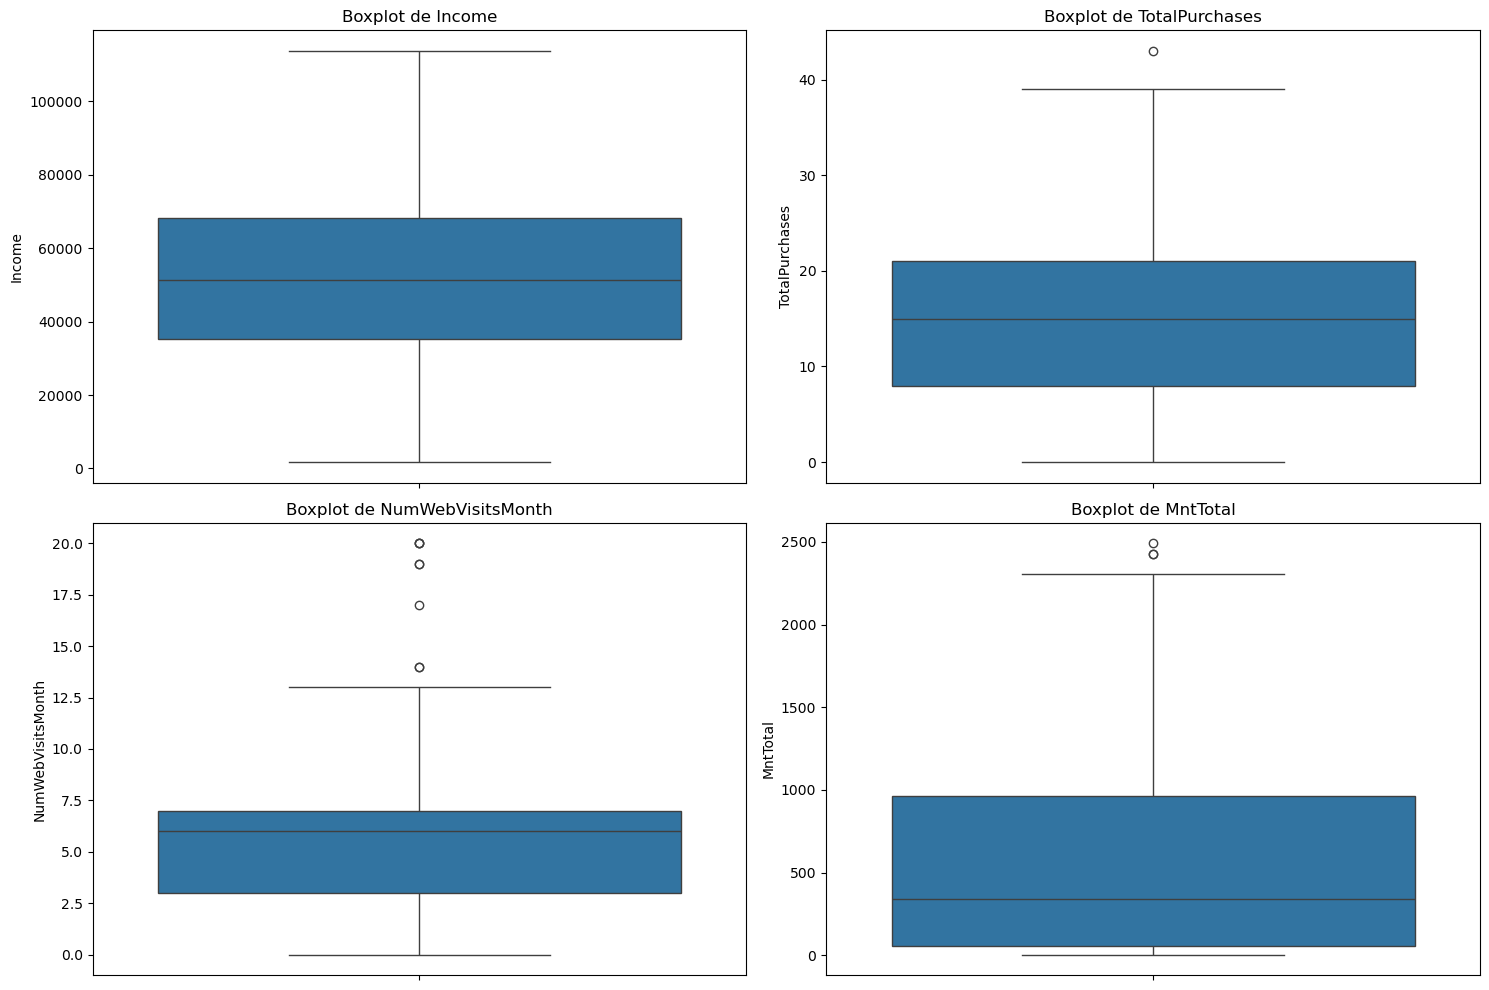

In [62]:
columnas = ['Income', 'TotalPurchases', 'NumWebVisitsMonth', 'MntTotal']
n_columnas = 2
n_filas = math.ceil(len(columnas) / n_columnas)

fig, axes = plt.subplots(n_filas, n_columnas, figsize=(15, 5 * n_filas))

# Aplanar el array de axes para iterar sin errores 
axes = axes.flatten()

for i, col in enumerate(columnas):
    sns.boxplot(y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}') 

plt.tight_layout()

plt.show()

### Outliers identificados usando el método "Interquartile Range" (IQR):

In [100]:
#columna = 'Income'
q1 = df["Income"].quantile(0.25)
q3 = df["Income"].quantile(0.75)
IQR = q3 - q1
outliers = df[(df["Income"] < q1 - 1.5 * IQR) | (df["Income"] > q3 + 1.5 * IQR)]
print("Outliers identificados en 'Income'", len(outliers))


Outliers identificados en 'Income' 0


In [98]:
#columna  'TotalPurchases'
q1 = df["TotalPurchases"].quantile(0.25)
q3 = df["TotalPurchases"].quantile(0.75)
IQR = q3 - q1
outliers = df[(df["TotalPurchases"] < q1 - 1.5 * IQR) | (df["TotalPurchases"] > q3 + 1.5 * IQR)]
print("Outliers identificados en 'TotalPurchases'", len(outliers))

Outliers identificados en 'TotalPurchases' 1


In [96]:
#columna  'NumWebVisitsMonth'
q1 = df["NumWebVisitsMonth"].quantile(0.25)
q3 = df["NumWebVisitsMonth"].quantile(0.75)
IQR = q3 - q1
outliers = df[(df["NumWebVisitsMonth"] < q1 - 1.5 * IQR) | (df["NumWebVisitsMonth"] > q3 + 1.5 * IQR)]
print("Outliers identificados en 'NumWebVisitsMonth'", len(outliers))

Outliers identificados en 'NumWebVisitsMonth' 8


In [94]:
#columna 'MntTotal'
q1 = df["MntTotal"].quantile(0.25)
q3 = df["MntTotal"].quantile(0.75)
IQR = q3 - q1
outliers = df[(df["MntTotal"] < q1 - 1.5 * IQR) | (df["MntTotal"] > q3 + 1.5 * IQR)]
print("Outliers identificados en 'MntTotal'", len(outliers))

Outliers identificados en 'MntTotal' 3


### Agrupando y agreando columnas para simplificar el análisis exploratorio
Agrupando las columnas como educación y estado civil, etc para crear una única columna categórica para cada una, lo que simplificará el análisis y la visualización. 

In [11]:
marital_cols = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']

df["marital_status"] = df[marital_cols].idxmax(axis = 1)
df["marital_status"] = df["marital_status"].str.replace("marital_", "")

In [21]:
df["marital_status"].head()

0      Single
1      Single
2    Together
3    Together
4     Married
Name: marital_status, dtype: object

In [17]:
education_cols = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']
df["education_status"] = df[education_cols].idxmax(axis = 1)
df["education_status"] = df["education_status"].str.replace("education_","")

In [25]:
df["education_status"].head()

0    Graduation
1    Graduation
2    Graduation
3    Graduation
4           PhD
Name: education_status, dtype: object

In [27]:
basic = df["education_status"].value_counts(normalize=True)*100
basic

education_status
Graduation    50.476190
PhD           21.587302
Master        16.507937
2n Cycle       8.979592
Basic          2.448980
Name: proportion, dtype: float64

In [56]:
df[["Age","Income"]].agg(["min","max"]

,Age,Income
min,24,1730.0
max,80,113734.0


In [35]:
#age groups
age_bins = [24, 30, 40, 50, 60, 70, 80]
labels_age = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

df['age_group'] = pd.cut(df['Age'], bins = age_bins, labels = labels_age, right= True)

In [13]:
#Income groups
income_bins = [1730, 20000, 40000, 60000, 80000, 113734]
income_labels = ['1700-20000','20001-40000','40001-60000','60001-80000','80001-100000+']
df['income_group'] = pd.cut(df['Income'], bins= income_bins, labels= income_labels, right= True)

In [31]:
#tiempo que el cliente lleva con la empresa 
df["Customer_Days"].agg(["max", "min"])

max    2858
min    2159
Name: Customer_Days, dtype: int64

In [37]:
# 6 años = 2191 dias
# 7años = 2555 dias
# 8 años = 2920 dias (mayor al maximo encontrado en la base de datos)
days_bins = [2159, 2191, 2555, 2858]
days_labels = ['5','6','7']
df["Years_With_Company"] = pd.cut(df["Customer_Days"], bins= days_bins, labels = days_labels, right= False)

In [21]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'client_id', 'TotalPurchases', 'marital_status',
       'education_status', 'age_group', 'income_group', 'Years_With_Company'],
      dtype='object')

In [23]:
df.shape

(2205, 46)

# Fase 2: Análisis Exploratorio de Datos y Visualización (EDA)

## Análisis Descriptivo

#### Distribución de las Variables Categóricas
Ver la distribución de las variables categóricas.


#### Visión Macro con Variables Consolidadas: 
Al usar variables como 'TotalPurchases', 'MntTotal', 'age_group', e 'income_group', se obtiene rápidamente una visión general de los perfiles de  clientes. 
Se empiezan a responder preguntas de alto nivel como: "¿El gasto total de los clientes varía significativamente entre los diferentes grupos de edad?" o "¿Los clientes con mayores ingresos tienden a aceptar más campañas en general?". 

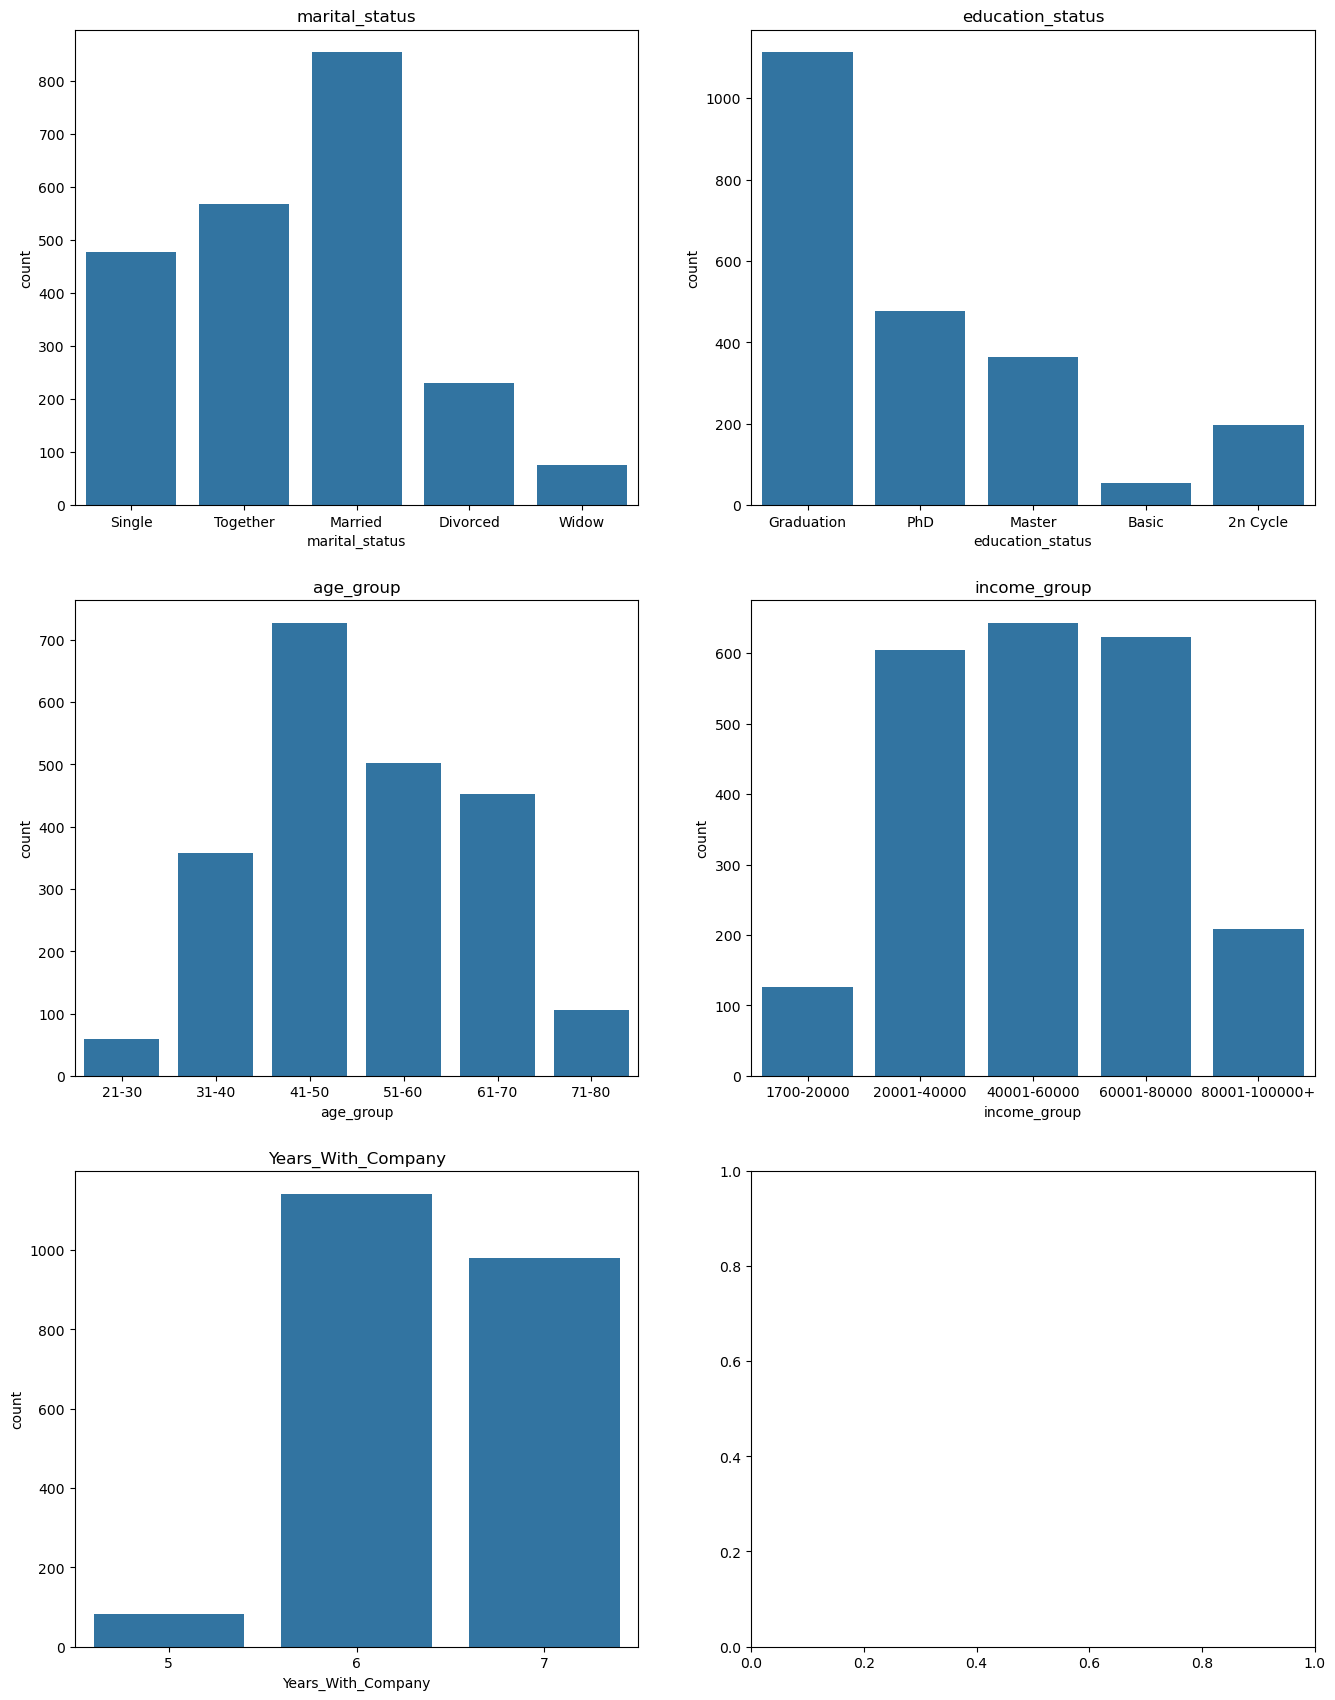

In [70]:
columnas = ['marital_status', 'education_status', 'age_group', 'income_group', 'Years_With_Company']
n_col = 2
n_filas = math.ceil(len(columnas)/n_col)
fig,axes = plt.subplots(n_filas, n_col, figsize = (16,7*n_filas))
axes = axes.flatten()
for i, col in enumerate(columnas):
    sns.countplot(x = col, data = df, ax = axes[i])
    axes[i].set_title(f'{col}')

In [29]:
marital_perc =  df["marital_status"].value_counts(normalize = True).round(2)
marital_perc

marital_status
Married     0.39
Together    0.26
Single      0.22
Divorced    0.10
Widow       0.03
Name: proportion, dtype: float64

In [31]:
marital_perc =  df["education_status"].value_counts(normalize = True).round(2)
marital_perc

education_status
Graduation    0.50
PhD           0.22
Master        0.17
2n Cycle      0.09
Basic         0.02
Name: proportion, dtype: float64

In [33]:
marital_perc =  df["age_group"].value_counts(normalize = True).round(2)
marital_perc

age_group
41-50    0.33
51-60    0.23
61-70    0.21
31-40    0.16
71-80    0.05
21-30    0.03
Name: proportion, dtype: float64

In [35]:
marital_perc =  df["income_group"].value_counts(normalize = True).round(2)
marital_perc

income_group
40001-60000      0.29
60001-80000      0.28
20001-40000      0.27
80001-100000+    0.09
1700-20000       0.06
Name: proportion, dtype: float64

In [37]:
marital_perc =  df["Years_With_Company"].value_counts(normalize = True).round(2)
marital_perc

Years_With_Company
6    0.52
7    0.44
5    0.04
Name: proportion, dtype: float64

#### Distribución de las Variables Cuantitativas

Utilizando KDE plots para visualizar la distribución de las variables numéricas clave (Income, 'TotalPurchases', 'MntTotal').


'TotalPurchases' 'Kidhome' 'Teenhome' 'MntTotal'


In [27]:

kids = df["Kidhome"].value_counts(normalize=True).round(2)
kids

Kidhome
0    0.58
1    0.40
2    0.02
Name: proportion, dtype: float64

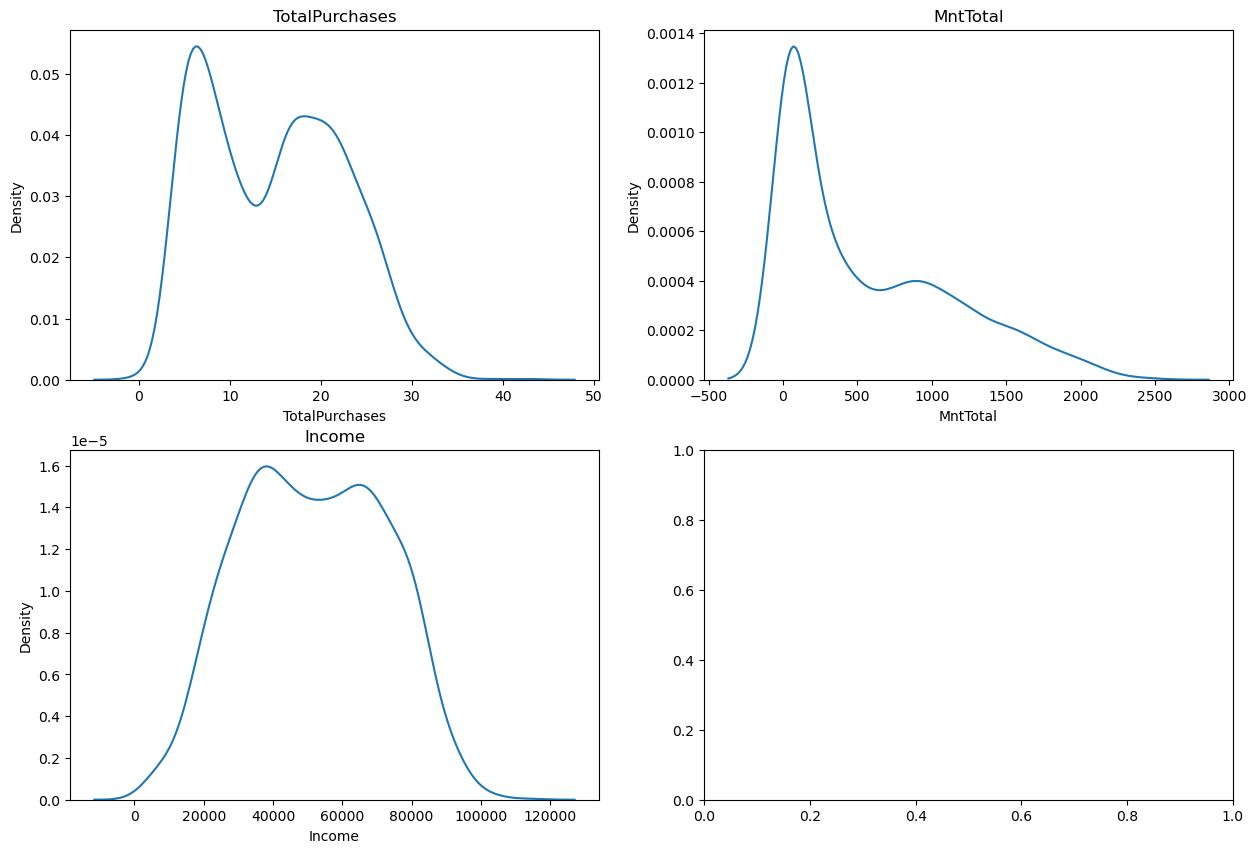

In [59]:
#sns.histplot(data = df, x = "TotalPurchases")

columnas = ['TotalPurchases', 'MntTotal', 'Income']

n_col = 2
n_filas = math.ceil(len(columnas) /n_col)  

fig, axes = plt.subplots(n_filas, n_col, figsize = (15,5 * n_filas))

axes = axes.flatten()

for i, col in enumerate(columnas):
    sns.kdeplot(data= df, x = col, ax = axes[i])
    axes[i].set_title(f'{col}')


plt.show()

### Visualizando Variables de Hijos

In [29]:
teens = df["Teenhome"].value_counts(normalize=True).round(2)
teens

Teenhome
0    0.52
1    0.46
2    0.02
Name: proportion, dtype: float64

<Axes: xlabel='Kidhome', ylabel='count'>

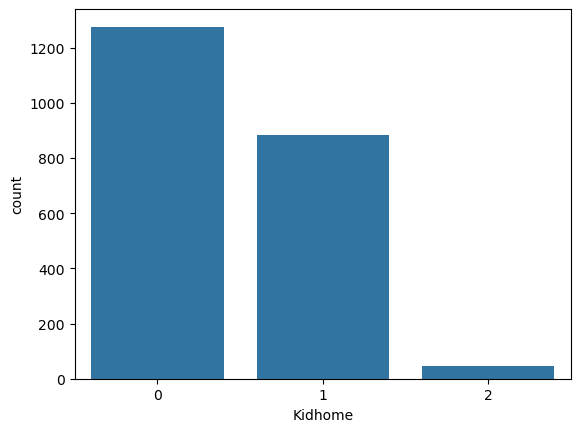

In [9]:
sns.countplot(x = df['Kidhome'], data = df)

<Axes: xlabel='Teenhome', ylabel='count'>

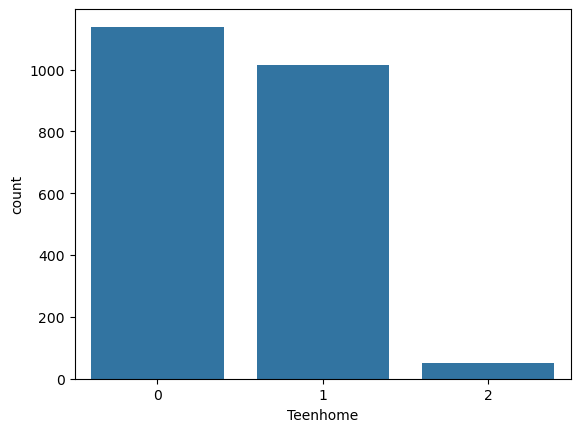

In [11]:
sns.countplot(x = df['Teenhome'], data = df)

## Visualización de Relaciones

Explorar la relación entre variables numéricas, por ejemplo, Income vs. MntTotal.

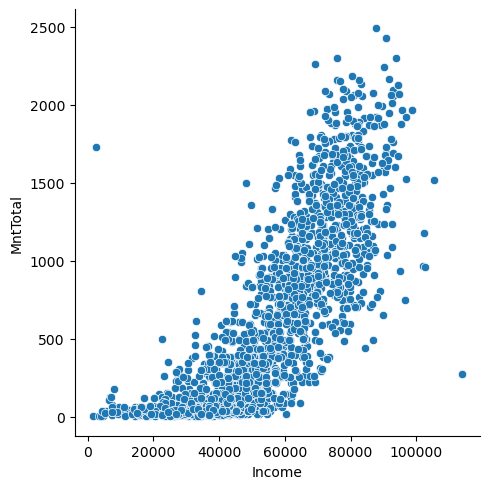

In [55]:
#¿Los que ganan más también gastan más? o viceversa? 
#Qué tipo de relación existe, positiva? negativa? no hay relación? 
#Income Vs. MntTotal

sns.relplot(x= df["Income"],y =df["MntTotal"] , data = df, kind = "scatter")


In [99]:
inc_Mnttotal = df["Income"].corr(df["MntTotal"])
inc_Mnttotal

0.8230660021398379

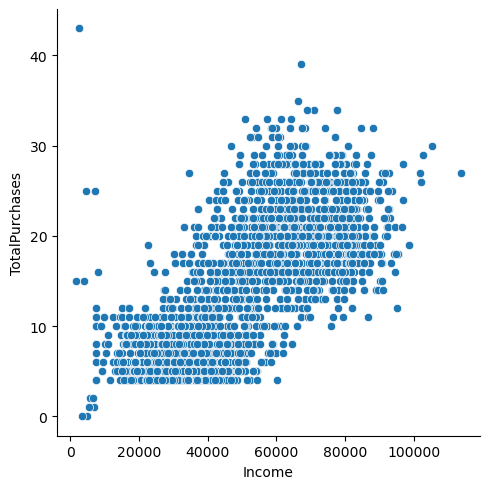

In [71]:
#¿Los que gastan más son los que compran más veces ? 
#TotalPurchases Vs Income
sns.relplot(x= df["Income"], y=df["TotalPurchases"] , data= df, kind= "scatter")

In [89]:
inc_purchases = df["Income"].corr(df["TotalPurchases"])
inc_purchases

0.7015682539705738

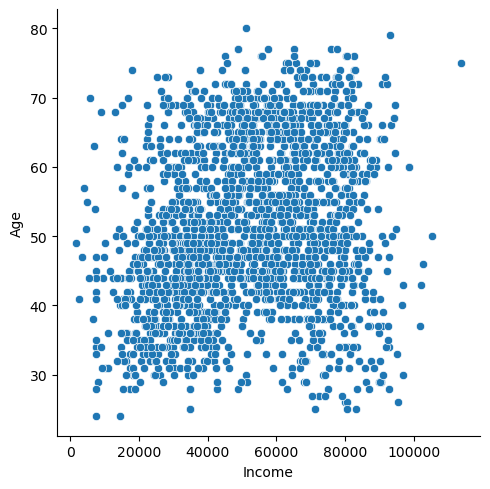

In [83]:
#¿Las personas con más plata son mayores o jóvenes? 
#Income Vs Age
sns.relplot(x=df["Income"] , y=df["Age"] , data= df, kind= "scatter")

In [85]:
inc_age = df["Income"].corr(df["Age"])
inc_age

0.21262531539014945

### Relaciones entre variables
Comparar variables cuantitativas entre diferentes grupos categóricos (por ejemplo, TotalSpent por nivel de Education).

Cualitativas:  'marital_status' 'education_status'  'age_group' 'income_group' 'Years_With_Company

Cuantitativas: 'MntTotal'  'TotalPurchases'  "Income"any'


<Axes: xlabel='age_group', ylabel='Income'>

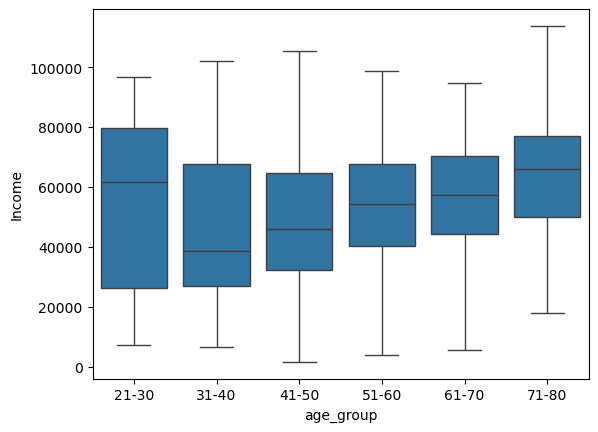

In [151]:
sns.boxplot(data = df, x= "age_group" , y ="Income")

<Axes: xlabel='education_status', ylabel='Income'>

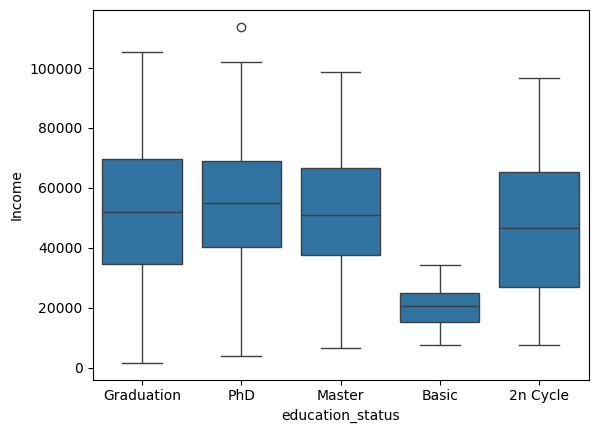

In [149]:
sns.boxplot(data = df, x= "education_status" , y ="Income")

<Axes: xlabel='Years_With_Company', ylabel='TotalPurchases'>

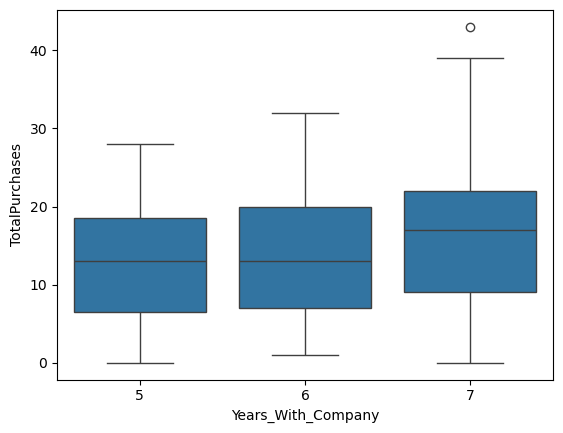

In [145]:
sns.boxplot(data = df, x= "Years_With_Company" , y ="TotalPurchases")

<Axes: xlabel='income_group', ylabel='TotalPurchases'>

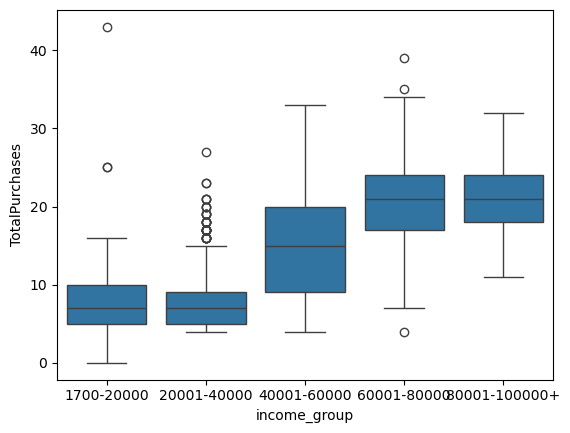

In [65]:
sns.boxplot(data = df, x= "income_group" , y ="TotalPurchases")

<Axes: xlabel='age_group', ylabel='TotalPurchases'>

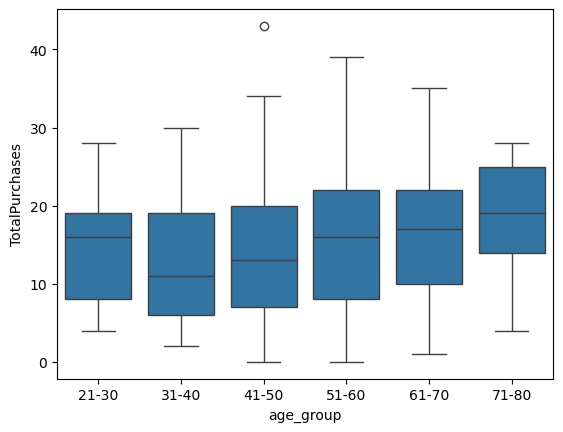

In [141]:
sns.boxplot(data = df, x= "age_group" , y ="TotalPurchases")

<Axes: xlabel='education_status', ylabel='TotalPurchases'>

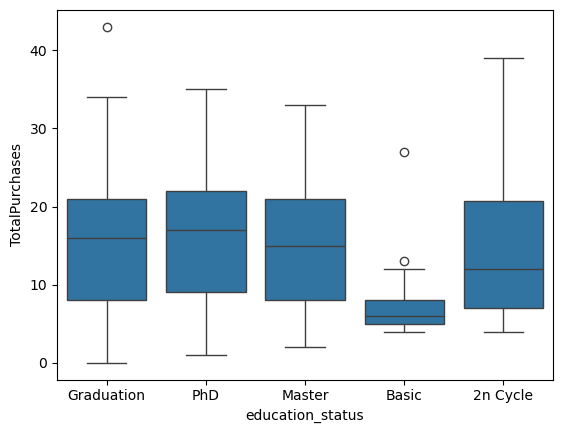

In [139]:
sns.boxplot(data = df, x= "education_status" , y ="TotalPurchases")

<Axes: xlabel='marital_status', ylabel='TotalPurchases'>

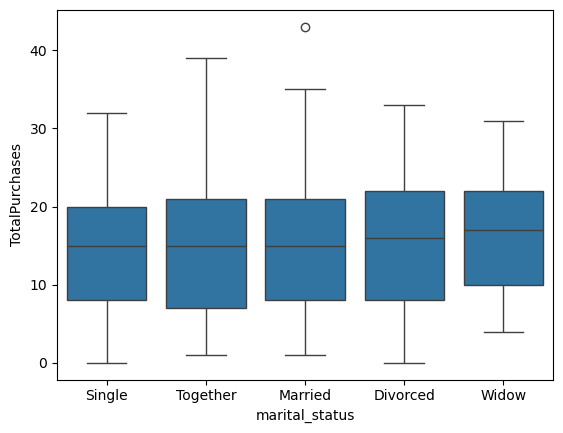

In [137]:
sns.boxplot(data = df, x= "marital_status" , y ="TotalPurchases")

<Axes: xlabel='Years_With_Company', ylabel='MntTotal'>

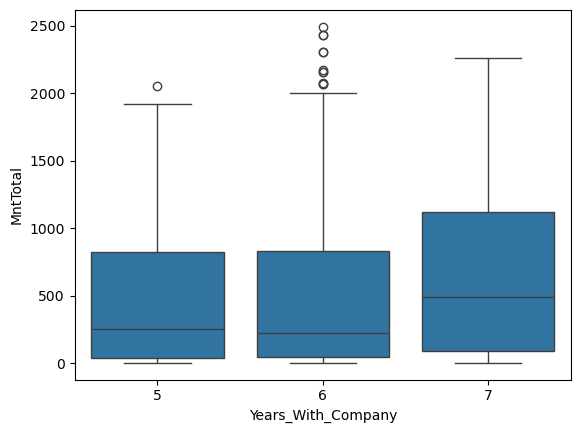

In [129]:
sns.boxplot(data = df, x= "Years_With_Company" , y ="MntTotal")

<Axes: xlabel='income_group', ylabel='MntTotal'>

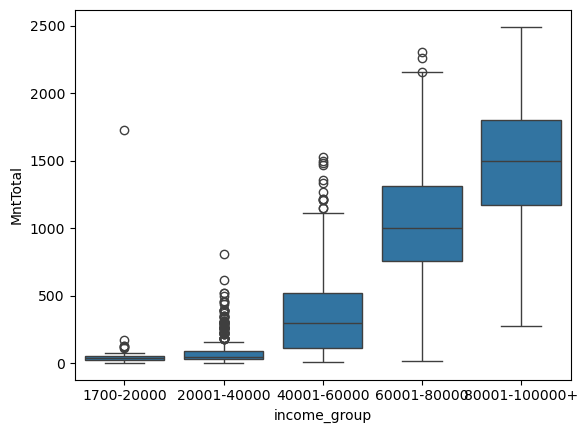

In [127]:
sns.boxplot(data = df, x= "income_group" , y ="MntTotal")

<Axes: xlabel='age_group', ylabel='MntTotal'>

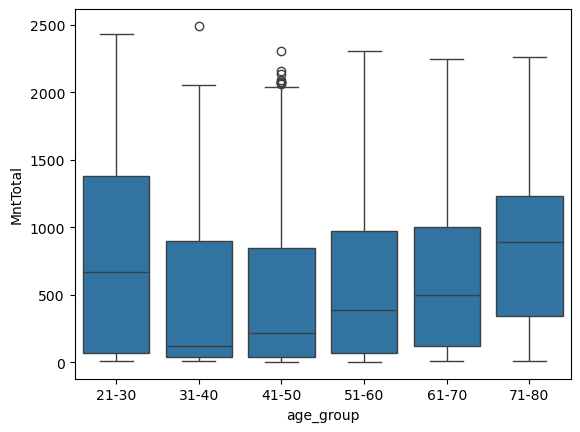

In [125]:
sns.boxplot(data = df, x= "age_group" , y ="MntTotal" )

<Axes: xlabel='education_status', ylabel='MntTotal'>

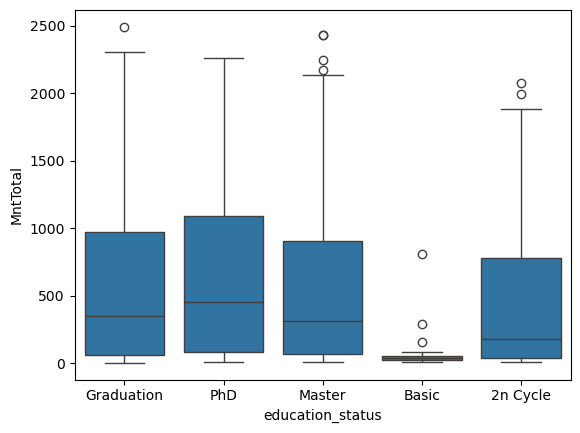

In [119]:
sns.boxplot(data = df, x= "education_status" , y ="MntTotal" )

<Axes: xlabel='marital_status', ylabel='MntTotal'>

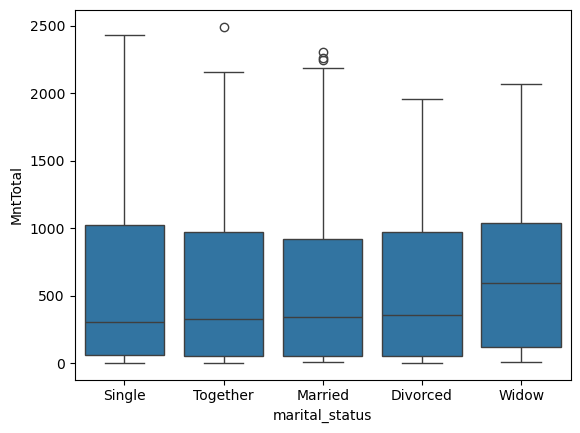

In [121]:
sns.boxplot(data = df, x= "marital_status" , y ="MntTotal" )

### Correlación de Variables


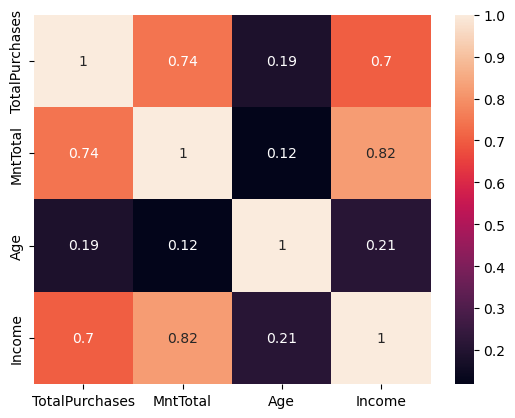

In [31]:
sns.heatmap(df[['TotalPurchases','MntTotal', 'Age', 'Income']].corr(), annot = True)
plt.show()

**Heatmap granual de tipor de productos Vs. Income**

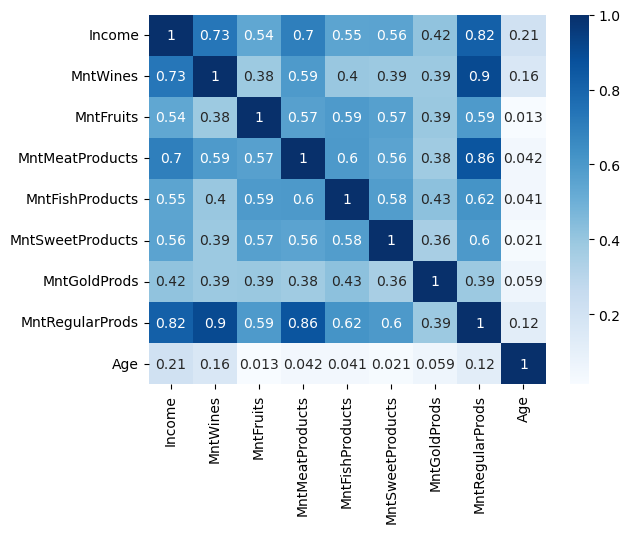

In [33]:
sns.heatmap(df[['Income', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds','MntRegularProds', 'Age']].corr(), annot= True, cmap= 'Blues')
plt.show()

## Análisis de Campañas de Marketing

In [31]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'client_id', 'TotalPurchases', 'marital_status',
       'education_status', 'age_group', 'income_group', 'Years_With_Company'],
      dtype='object')

#### Frecuencia de compra por canal
¿qué pasa con los canales de compra individuales? 

¿Los clientes con ingresos altos compran más por internet, en la tienda o a través del catálogo? 


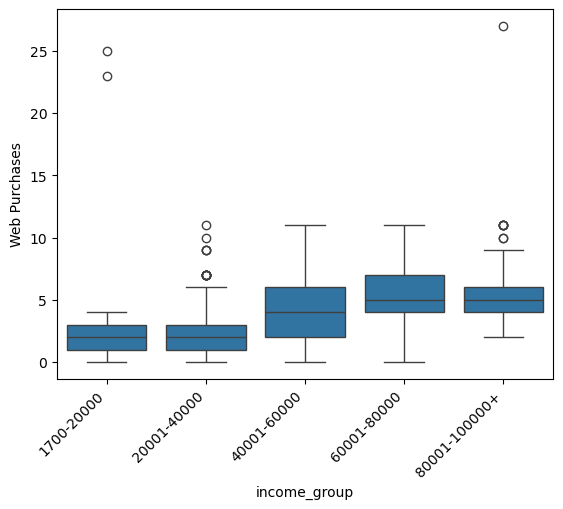

In [110]:
sns.boxplot(data = df, x= 'income_group', y = 'NumWebPurchases')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Web Purchases")
plt.show()

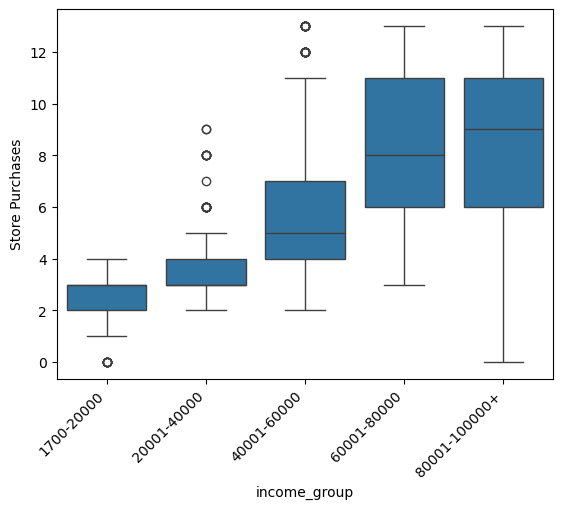

In [130]:
sns.boxplot(data = df, x= 'income_group', y = 'NumStorePurchases')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Store Purchases")
plt.show()

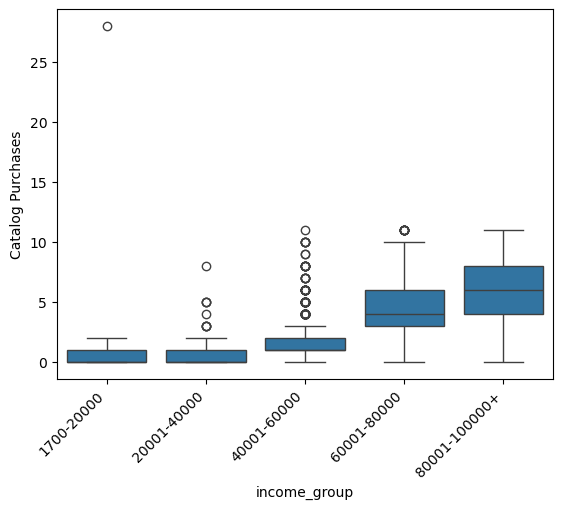

In [132]:
sns.boxplot(data = df, x= 'income_group', y = 'NumCatalogPurchases')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Catalog Purchases")
plt.show()

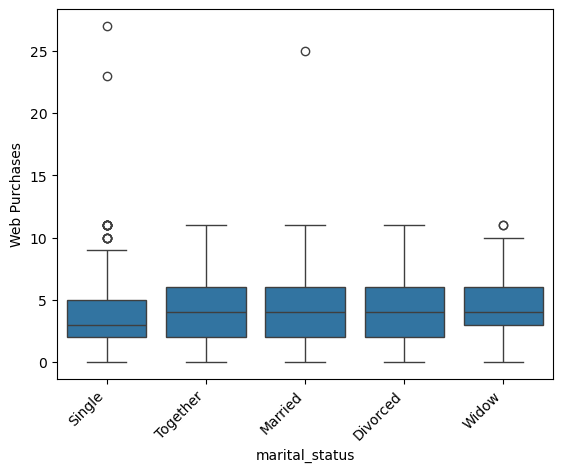

In [17]:
sns.boxplot(data = df, x= 'marital_status', y = 'NumWebPurchases')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Web Purchases")
plt.show()

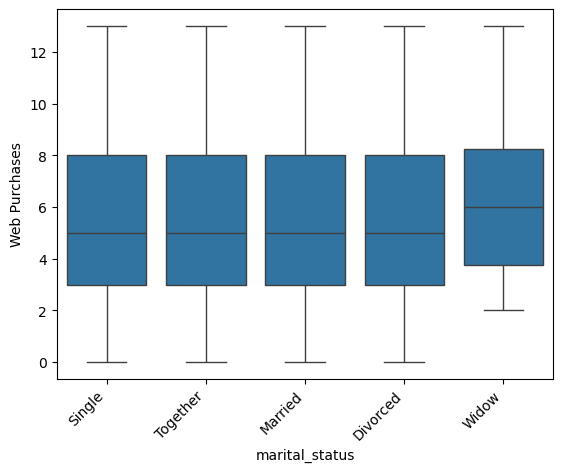

In [19]:
sns.boxplot(data = df, x= 'marital_status', y = 'NumStorePurchases')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Web Purchases")
plt.show()

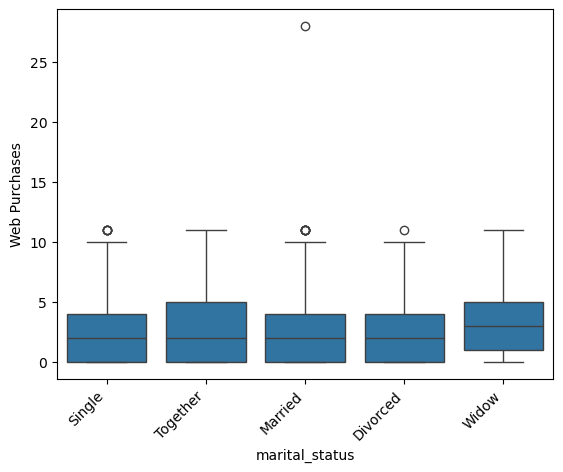

In [21]:
sns.boxplot(data = df, x= 'marital_status', y = 'NumCatalogPurchases')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Web Purchases")
plt.show()

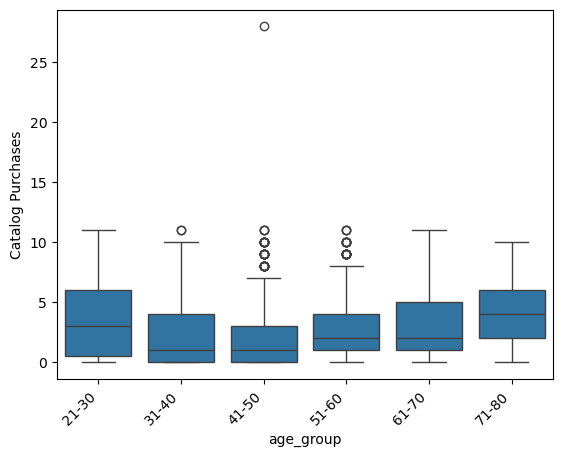

In [77]:
sns.boxplot(data = df, x= 'age_group', y = 'NumCatalogPurchases')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Catalog Purchases")
plt.show()

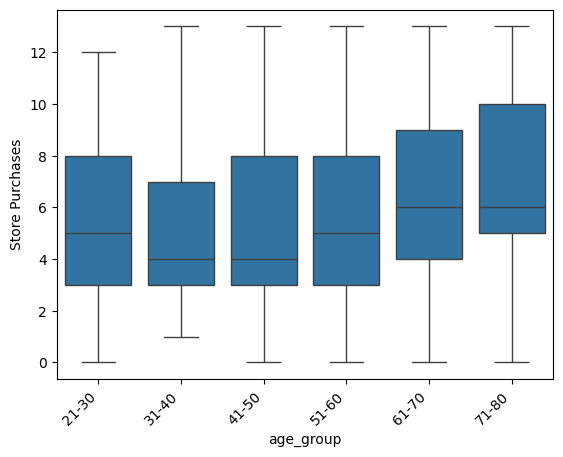

In [45]:
sns.boxplot(data = df, x= 'age_group', y = 'NumStorePurchases')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Store Purchases")
plt.show()

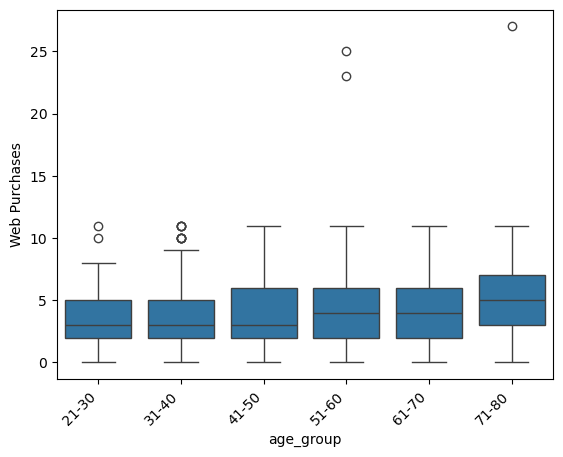

In [39]:
sns.boxplot(data = df, x= 'age_group', y = 'NumWebPurchases')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Web Purchases")
plt.show()

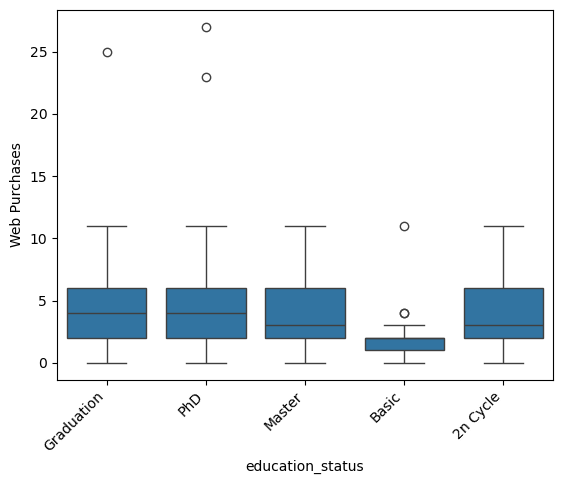

In [53]:
sns.boxplot(data = df, x= 'education_status', y = 'NumWebPurchases')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Web Purchases")
plt.show()

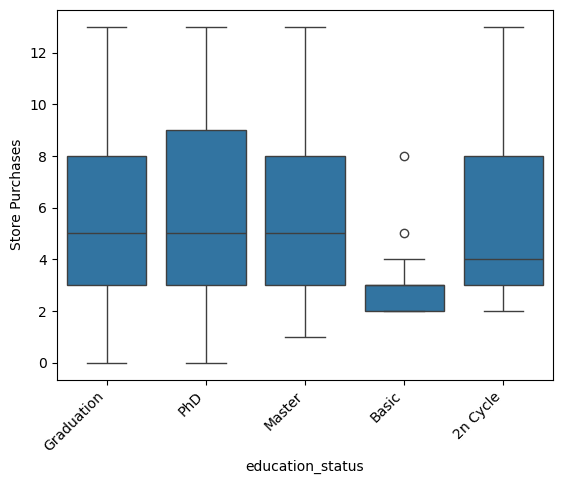

In [57]:
sns.boxplot(data = df, x= 'education_status', y = 'NumStorePurchases')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Store Purchases")
plt.show()

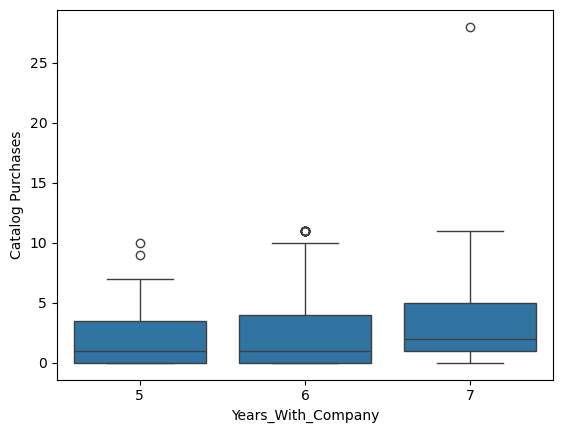

In [69]:
sns.boxplot(data = df, x= 'Years_With_Company', y = 'NumCatalogPurchases')

plt.ylabel("Catalog Purchases")
plt.show()

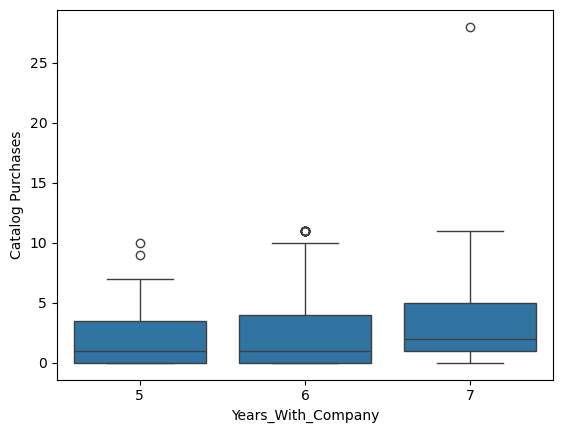

In [69]:
sns.boxplot(data = df, x= 'Years_With_Company', y = 'NumCatalogPurchases')

plt.ylabel("Catalog Purchases")
plt.show()

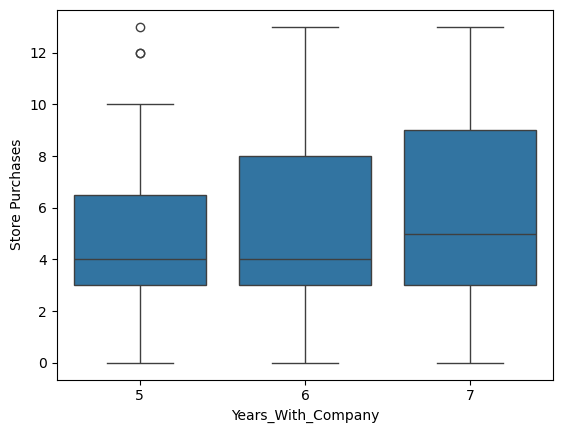

In [73]:
sns.boxplot(data = df, x= 'Years_With_Company', y = 'NumStorePurchases')

plt.ylabel("Store Purchases")
plt.show()

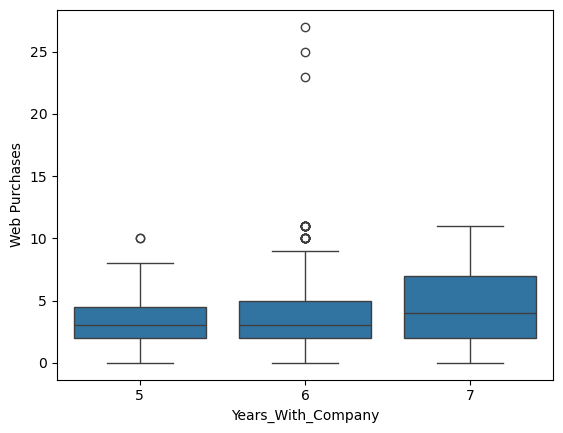

In [75]:
sns.boxplot(data = df, x= 'Years_With_Company', y = 'NumWebPurchases')

plt.ylabel("Web Purchases")
plt.show()

In [47]:
channels_cols = ['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']

profile_cols = ['marital_status', 'education_status', 'age_group', 'income_group', 'Years_With_Company']

results = {}

for campaign in channels_cols:
    for profile in profile_cols:
        key = f'{campaign}_por_{profile}'
        
        results[key] = (df.groupby(profile)[campaign].mean()).round(2)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9352\1601890145.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results[key] = (df.groupby(profile)[campaign].mean()).round(2)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9352\1601890145.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results[key] = (df.groupby(profile)[campaign].mean()).round(2)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9352\1601890145.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futur

In [49]:
for key, value in results.items():
    print(f"\n--- Tasa de éxito de {key} ---")
    print(value)


--- Tasa de éxito de NumWebPurchases_por_marital_status ---
marital_status
Divorced    4.34
Married     4.10
Single      3.88
Together    4.12
Widow       4.62
Name: NumWebPurchases, dtype: float64

--- Tasa de éxito de NumWebPurchases_por_education_status ---
education_status
2n Cycle      3.79
Basic         1.89
Graduation    4.12
Master        4.04
PhD           4.47
Name: NumWebPurchases, dtype: float64

--- Tasa de éxito de NumWebPurchases_por_age_group ---
age_group
21-30    3.64
31-40    3.43
41-50    3.87
51-60    4.38
61-70    4.49
71-80    5.29
Name: NumWebPurchases, dtype: float64

--- Tasa de éxito de NumWebPurchases_por_income_group ---
income_group
1700-20000       2.08
20001-40000      2.16
40001-60000      4.44
60001-80000      5.66
80001-100000+    5.25
Name: NumWebPurchases, dtype: float64

--- Tasa de éxito de NumWebPurchases_por_Years_With_Company ---
Years_With_Company
5    3.47
6    3.68
7    4.64
Name: NumWebPurchases, dtype: float64

--- Tasa de éxito de NumSto

#### Agrupando datos por exito de campañas
Comparando el perfil de los clientes que aceptaron la oferta con los que no lo hicieron.


'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'

In [42]:
Cmp1_exitos = df.groupby('AcceptedCmp1')[["Income", "MntTotal", "TotalPurchases", 'Age']].mean().round(2) 
Cmp1_exitos

,Income,MntTotal,TotalPurchases,Age
AcceptedCmp1,,,,
0,49746.39,504.68,14.45,51.06
1,78872.63,1406.70,21.29,51.62


In [44]:
Cmp2_exitos = df.groupby('AcceptedCmp2')[["Income", "MntTotal", "TotalPurchases", 'Age']].mean().round(2) 
Cmp2_exitos

,Income,MntTotal,TotalPurchases,Age
AcceptedCmp2,,,,
0,51354.06,553.41,14.82,51.09
1,71054.83,1241.27,19.93,51.87


In [50]:
Cmp3_exitos = df.groupby('AcceptedCmp3')[["Income", "MntTotal", "TotalPurchases", 'Age']].mean().round(2) 
Cmp3_exitos

,Income,MntTotal,TotalPurchases,Age
AcceptedCmp3,,,,
0,51687.51,555.51,14.84,51.30
1,50802.58,653.60,15.43,48.55


In [52]:
Cmp4_exitos = df.groupby('AcceptedCmp4')[["Income", "MntTotal", "TotalPurchases", 'Age']].mean().round(2) 
Cmp4_exitos

,Income,MntTotal,TotalPurchases,Age
AcceptedCmp4,,,,
0,50252.79,520.46,14.47,50.86
1,68663.23,1089.20,20.07,53.98


In [54]:
Cmp5_exitos = df.groupby('AcceptedCmp5')[["Income", "MntTotal", "TotalPurchases", 'Age']].mean().round(2) 
Cmp5_exitos

,Income,MntTotal,TotalPurchases,Age
AcceptedCmp5,,,,
0,49202.1,485.91,14.42,51.16
1,82345.5,1538.45,20.86,50.29


#### Variables categoricas
Calculando la **tasa de éxito** de cada grupo.

In [90]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
profile_cols = ['marital_status', 'education_status', 'age_group', 'income_group', 'Years_With_Company']
results = {}

for campaign in campaign_cols:
    for profile in profile_cols:
        key = f'{campaign}_by_{profile}'
        
        results[key] = (df.groupby(profile)[campaign].mean() * 100).round(2)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17232\4134178533.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results[key] = (df.groupby(profile)[campaign].mean() * 100).round(2)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17232\4134178533.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results[key] = (df.groupby(profile)[campaign].mean() * 100).round(2)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17232\4134178533.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to 

In [94]:
for key, value in results.items():
    print(f"\n--- Tasa de éxito de {key} ---")
    print(value)


--- Tasa de éxito de AcceptedCmp1_by_marital_status ---
marital_status
Divorced    5.22
Married     7.26
Single      6.50
Together    5.63
Widow       6.58
Name: AcceptedCmp1, dtype: float64

--- Tasa de éxito de AcceptedCmp1_by_education_status ---
education_status
2n Cycle      7.07
Basic         0.00
Graduation    7.19
Master        4.95
PhD           6.30
Name: AcceptedCmp1, dtype: float64

--- Tasa de éxito de AcceptedCmp1_by_age_group ---
age_group
21-30    11.86
31-40     7.56
41-50     4.95
51-60     5.18
61-70     7.06
71-80    13.33
Name: AcceptedCmp1, dtype: float64

--- Tasa de éxito de AcceptedCmp1_by_income_group ---
income_group
1700-20000        0.00
20001-40000       0.17
40001-60000       0.93
60001-80000      10.27
80001-100000+    34.13
Name: AcceptedCmp1, dtype: float64

--- Tasa de éxito de AcceptedCmp1_by_Years_With_Company ---
Years_With_Company
5    9.64
6    6.57
7    6.03
Name: AcceptedCmp1, dtype: float64

--- Tasa de éxito de AcceptedCmp2_by_marital_status

# Fase 3: Inferencia Estadística e Hipótesis

## 1. Prueba de Hipótesis:

Hipótesis; ¿El estado marital influye en la aceptación a las campañas? 
- Hipótesis Nula (H0​): marital_status y AcceptedCmp1(2,3,4 y5) Son Independientes, no existe relación entre ellas.
- Hipótesis Alternativa (HA​): marital_status y AcceptedCmp1(2,3,4 y5) NO SON Independientes, existe una relación entre ellas.

P>𝛼 = Independencia
P < 𝛼 = Dependencia


In [27]:
import pingouin as pg

In [ ]:
cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
var_cat = 'marital_status'

alpha = 0.1


In [42]:
# Prueba de Chi-cuadrado
chi2_cmp1 = pg.chi2_independence(data=df, x='marital_status', y='AcceptedCmp1')

print(chi2_result)

(AcceptedCmp1             0          1
marital_status                       
Divorced        215.188209  14.811791
Married         799.003175  54.996825
Single          446.281633  30.718367
Together        531.421315  36.578685
Widow            71.105669   4.894331, AcceptedCmp1      0   1
marital_status         
Divorced        218  12
Married         792  62
Single          446  31
Together        536  32
Widow            71   5,                  test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  2.141445  4.0  0.709762  0.031164  0.181428
1        cressie-read  0.666667  2.149661  4.0  0.708255  0.031223  0.182010
2      log-likelihood  0.000000  2.168652  4.0  0.704772  0.031361  0.183358
3       freeman-tukey -0.500000  2.185202  4.0  0.701739  0.031480  0.184534
4  mod-log-likelihood -1.000000  2.203803  4.0  0.698333  0.031614  0.185859
5              neyman -2.000000  2.247454  4.0  0.690351  0.031926  0.188974)


C:\Users\ASUS\anaconda3\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")


dado que el p-valor es 0.7 y es 0.7 > 0.1 alpha, entonces se falla en rechazar la hipótesis nula.
La conclusión es qu*No hay evidencia suficiente para afirmar queamarita_ statul y al campaña a son variables dependientes.


In [35]:
chi2_Cmp2 = pg.chi2_independence(data= df, x= "marital_status" , y= "AcceptedCmp2")
print(chi2_Cmp2)

(AcceptedCmp2             0          1
marital_status                       
Divorced        226.870748   3.129252
Married         842.380952  11.619048
Single          470.510204   6.489796
Together        560.272109   7.727891
Widow            74.965986   1.034014, AcceptedCmp2      0   1
marital_status         
Divorced        225   5
Married         847   7
Single          472   5
Together        556  12
Widow            75   1,                  test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  5.737514  4.0  0.219627  0.051010  0.451025
1        cressie-read  0.666667  5.655206  4.0  0.226420  0.050643  0.444990
2      log-likelihood  0.000000  5.557145  4.0  0.234752  0.050202  0.437769
3       freeman-tukey -0.500000  5.540691  4.0  0.236176  0.050128  0.436554
4  mod-log-likelihood -1.000000  5.573296  4.0  0.233361  0.050275  0.438961
5              neyman -2.000000  5.792135  4.0  0.215219  0.051252  0.455016)


C:\Users\ASUS\anaconda3\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\ASUS\anaconda3\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")


dado que el p-valor es 0.2 y es 0.2 > 0.1 alpha, entonces se falla en rechazar la hipótesis nula.
La conclusión es qu**o hay evidencia suficiente para afirmar que amarita_ statsl y al campañ aa son variables dependientes.


In [40]:
chi2_Cmp2 = pg.chi2_independence(data= df, x= "marital_status" , y= "AcceptedCmp3")
print(chi2_Cmp2)

(AcceptedCmp3             0          1
marital_status                       
Divorced        212.997732  17.002268
Married         790.869841  63.130159
Single          441.738776  35.261224
Together        526.011791  41.988209
Widow            70.381859   5.618141, AcceptedCmp3      0   1
marital_status         
Divorced        210  20
Married         791  63
Single          438  39
Together        531  37
Widow            72   4,                  test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  2.142255  4.0  0.709614  0.031170  0.181485
1        cressie-read  0.666667  2.152630  4.0  0.707710  0.031245  0.182221
2      log-likelihood  0.000000  2.177758  4.0  0.703103  0.031427  0.184005
3       freeman-tukey -0.500000  2.200675  4.0  0.698906  0.031592  0.185636
4  mod-log-likelihood -1.000000  2.227343  4.0  0.694027  0.031783  0.187537
5              neyman -2.000000  2.293051  4.0  0.682034  0.032248  0.192240)


C:\Users\ASUS\anaconda3\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")


dado que el p-valor es 0.7 y es 0.7 > 0.1 alpha, entonces se falla en rechazar la hipótesis nula.
La conclusión es qeuNOo hay evidencia suficiente para afirmar que amarita_ statsl y al campañ aa son variables dependientes.


In [43]:
chi2_Cmp2 = pg.chi2_independence(data= df, x= "marital_status" , y= "AcceptedCmp4")
print(chi2_Cmp2)

(AcceptedCmp4             0          1
marital_status                       
Divorced        212.893424  17.106576
Married         790.482540  63.517460
Single          441.522449  35.477551
Together        525.754195  42.245805
Widow            70.347392   5.652608, AcceptedCmp4      0   1
marital_status         
Divorced        212  18
Married         792  62
Single          445  32
Together        526  42
Widow            66  10,                  test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  4.071607  4.0  0.396402  0.042971  0.325550
1        cressie-read  0.666667  3.846049  4.0  0.427242  0.041764  0.308306
2      log-likelihood  0.000000  3.459491  4.0  0.484064  0.039610  0.278841
3       freeman-tukey -0.500000  3.217023  4.0  0.522186  0.038196  0.260479
4  mod-log-likelihood -1.000000  3.008124  4.0  0.556467  0.036935  0.244774
5              neyman -2.000000  2.671147  4.0  0.614273  0.034805  0.219742)


dado que el p-valor es 0.3 y es 0.3 > 0.1 alpha, entonces se falla en rechazar la hipótesis nula. La conclusión es qu NO hay evidencia suficiente para afirmar quea marital_status y al campaña 4 son variables dependientes.

In [46]:
chi2_Cmp5 = pg.chi2_independence(data= df, x= "marital_status" , y= "AcceptedCmp5")
print(chi2_Cmp2)

(AcceptedCmp4             0          1
marital_status                       
Divorced        212.893424  17.106576
Married         790.482540  63.517460
Single          441.522449  35.477551
Together        525.754195  42.245805
Widow            70.347392   5.652608, AcceptedCmp4      0   1
marital_status         
Divorced        212  18
Married         792  62
Single          445  32
Together        526  42
Widow            66  10,                  test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  4.071607  4.0  0.396402  0.042971  0.325550
1        cressie-read  0.666667  3.846049  4.0  0.427242  0.041764  0.308306
2      log-likelihood  0.000000  3.459491  4.0  0.484064  0.039610  0.278841
3       freeman-tukey -0.500000  3.217023  4.0  0.522186  0.038196  0.260479
4  mod-log-likelihood -1.000000  3.008124  4.0  0.556467  0.036935  0.244774
5              neyman -2.000000  2.671147  4.0  0.614273  0.034805  0.219742)


dado que el p-valor es 0.39 y es 0.39 > 0.1 alpha, entonces se falla en rechazar la hipótesis nula. La conclusión es qu eNOo hay evidencia suficiente para afirmar quea marital_status y al campaña 5 son variables dependientes.

In [49]:
chi2_Cmp1_edu = pg.chi2_independence(data= df, x= "education_status" , y= "AcceptedCmp1")
print(chi2_Cmp1_edu)

(AcceptedCmp1                0          1
education_status                        
2n Cycle           185.248980  12.751020
Basic               50.522449   3.477551
Graduation        1041.323810  71.676190
Master             340.558730  23.441270
PhD                445.346032  30.653968, AcceptedCmp1         0   1
education_status          
2n Cycle           184  14
Basic               54   0
Graduation        1033  80
Master             346  18
PhD                446  30,                  test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  6.245760  4.0  0.181531  0.053222  0.487711
1        cressie-read  0.666667  6.961531  4.0  0.137935  0.056189  0.537422
2      log-likelihood  0.000000  9.789585  4.0  0.044125  0.066631  0.705464
3       freeman-tukey -0.500000       NaN  4.0       NaN       NaN       NaN
4  mod-log-likelihood -1.000000       inf  4.0  0.000000       inf       NaN
5              neyman -2.000000       NaN  4.0       NaN   

C:\Users\ASUS\anaconda3\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\ASUS\anaconda3\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7991: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


In [51]:
chi2_Cmp2_edu = pg.chi2_independence(data= df, x= "education_status" , y= "AcceptedCmp2")
print(chi2_Cmp2_edu)

(AcceptedCmp2                0          1
education_status                        
2n Cycle           195.306122   2.693878
Basic               53.265306   0.734694
Graduation        1097.857143  15.142857
Master             359.047619   4.952381
PhD                469.523810   6.476190, AcceptedCmp2         0   1
education_status          
2n Cycle           196   2
Basic               54   0
Graduation        1097  16
Master             362   2
PhD                466  10,                  test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  4.703369  4.0  0.319109  0.046185  0.373744
1        cressie-read  0.666667  4.906261  4.0  0.297052  0.047171  0.389114
2      log-likelihood  0.000000  5.696685  4.0  0.222974  0.050828  0.448034
3       freeman-tukey -0.500000       NaN  4.0       NaN       NaN       NaN
4  mod-log-likelihood -1.000000       inf  4.0  0.000000       inf       NaN
5              neyman -2.000000       NaN  4.0       NaN   

C:\Users\ASUS\anaconda3\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\ASUS\anaconda3\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7991: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


In [53]:
chi2_Cmp3_edu = pg.chi2_independence(data= df, x= "education_status" , y= "AcceptedCmp3")
print(chi2_Cmp3_edu)

(AcceptedCmp3                0          1
education_status                        
2n Cycle           183.363265  14.636735
Basic               50.008163   3.991837
Graduation        1030.723810  82.276190
Master             337.092063  26.907937
PhD                440.812698  35.187302, AcceptedCmp3         0   1
education_status          
2n Cycle           183  15
Basic               48   6
Graduation        1035  78
Master             340  24
PhD                436  40,                  test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  2.390748  4.0  0.664300  0.032928  0.199277
1        cressie-read  0.666667  2.338022  4.0  0.673855  0.032563  0.195473
2      log-likelihood  0.000000  2.243217  4.0  0.691125  0.031896  0.188671
3       freeman-tukey -0.500000  2.180417  4.0  0.702616  0.031446  0.184194
4  mod-log-likelihood -1.000000  2.123892  4.0  0.712984  0.031036  0.180185
5              neyman -2.000000  2.027138  4.0  0.730767  0

C:\Users\ASUS\anaconda3\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")


In [55]:
chi2_Cmp4_edu = pg.chi2_independence(data= df, x= "education_status" , y= "AcceptedCmp4")
print(chi2_Cmp4_edu)

(AcceptedCmp4                0          1
education_status                        
2n Cycle           183.273469  14.726531
Basic               49.983673   4.016327
Graduation        1030.219048  82.780952
Master             336.926984  27.073016
PhD                440.596825  35.403175, AcceptedCmp4         0   1
education_status          
2n Cycle           189   9
Basic               54   0
Graduation        1034  79
Master             333  31
PhD                431  45,                  test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  10.357209  4.0  0.034822  0.068536  0.733214
1        cressie-read  0.666667  11.189284  4.0  0.024517  0.071236  0.770286
2      log-likelihood  0.000000  14.497060  4.0  0.005867  0.081084  0.879240
3       freeman-tukey -0.500000        NaN  4.0       NaN       NaN       NaN
4  mod-log-likelihood -1.000000        inf  4.0  0.000000       inf       NaN
5              neyman -2.000000        NaN  4.0      

C:\Users\ASUS\anaconda3\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\ASUS\anaconda3\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7991: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


In [57]:
chi2_Cmp5_edu = pg.chi2_independence(data= df, x= "education_status" , y= "AcceptedCmp5")
print(chi2_Cmp5_edu)

(AcceptedCmp5                0          1
education_status                        
2n Cycle           183.542857  14.457143
Basic               50.057143   3.942857
Graduation        1031.733333  81.266667
Master             337.422222  26.577778
PhD                441.244444  34.755556, AcceptedCmp5         0   1
education_status          
2n Cycle           188  10
Basic               54   0
Graduation        1027  86
Master             337  27
PhD                438  38,                  test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000   6.367169  4.0  0.173355  0.053736  0.496314
1        cressie-read  0.666667   7.200775  4.0  0.125651  0.057146  0.553460
2      log-likelihood  0.000000  10.455237  4.0  0.033419  0.068859  0.737802
3       freeman-tukey -0.500000        NaN  4.0       NaN       NaN       NaN
4  mod-log-likelihood -1.000000        inf  4.0  0.000000       inf       NaN
5              neyman -2.000000        NaN  4.0      

C:\Users\ASUS\anaconda3\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\ASUS\anaconda3\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7991: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


In [59]:
chi2_Cmp1_inc = pg.chi2_independence(data= df, x= "income_group" , y= "AcceptedCmp1")
print(chi2_Cmp1_inc)

(AcceptedCmp1            0          1
income_group                        
1700-20000     117.882033   8.117967
20001-40000    565.085299  38.914701
40001-60000    601.572595  41.427405
60001-80000    582.861162  40.138838
80001-100000+  194.598911  13.401089, AcceptedCmp1     0   1
income_group          
1700-20000     126   0
20001-40000    603   1
40001-60000    637   6
60001-80000    559  64
80001-100000+  137  71,                  test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000  360.318676  4.0  1.037181e-76  0.404240   
1        cressie-read  0.666667  316.968764  4.0  2.364970e-67  0.379144   
2      log-likelihood  0.000000  291.078219  4.0  9.101675e-62  0.363329   
3       freeman-tukey -0.500000         NaN  4.0           NaN       NaN   
4  mod-log-likelihood -1.000000         inf  4.0  0.000000e+00       inf   
5              neyman -2.000000         NaN  4.0           NaN       NaN   

   power  
0    1.0  
1    1.0  
2    1.0  


C:\Users\ASUS\anaconda3\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7991: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


In [61]:
chi2_Cmp2_inc = pg.chi2_independence(data= df, x= "income_group" , y= "AcceptedCmp2")
print(chi2_Cmp2_inc)

(AcceptedCmp2            0         1
income_group                       
1700-20000     124.284936  1.715064
20001-40000    595.778584  8.221416
40001-60000    634.247731  8.752269
60001-80000    614.519964  8.480036
80001-100000+  205.168784  2.831216, AcceptedCmp2     0   1
income_group          
1700-20000     126   0
20001-40000    604   0
40001-60000    633  10
60001-80000    616   7
80001-100000+  195  13,                  test    lambda       chi2  dof          pval    cramer  \
0             pearson  1.000000  47.542686  4.0  1.175402e-09  0.146838   
1        cressie-read  0.666667  42.053985  4.0  1.625730e-08  0.138102   
2      log-likelihood  0.000000  40.265543  4.0  3.814212e-08  0.135133   
3       freeman-tukey -0.500000        NaN  4.0           NaN       NaN   
4  mod-log-likelihood -1.000000        inf  4.0  0.000000e+00       inf   
5              neyman -2.000000        NaN  4.0           NaN       NaN   

      power  
0  0.999982  
1  0.999907  
2  0.999841  
3 

C:\Users\ASUS\anaconda3\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\ASUS\anaconda3\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7991: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


In [63]:
chi2_Cmp3_inc = pg.chi2_independence(data= df, x= "income_group" , y= "AcceptedCmp3")
print(chi2_Cmp3_inc)

(AcceptedCmp3            0          1
income_group                        
1700-20000     116.681488   9.318512
20001-40000    559.330309  44.669691
40001-60000    595.446007  47.553993
60001-80000    576.925136  46.074864
80001-100000+  192.617060  15.382940, AcceptedCmp3     0   1
income_group          
1700-20000     113  13
20001-40000    556  48
40001-60000    596  47
60001-80000    593  30
80001-100000+  183  25,                  test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  14.394412  4.0  0.006137  0.080797  0.876675
1        cressie-read  0.666667  14.235684  4.0  0.006580  0.080350  0.872617
2      log-likelihood  0.000000  14.064615  4.0  0.007092  0.079866  0.868117
3       freeman-tukey -0.500000  14.059886  4.0  0.007106  0.079852  0.867990
4  mod-log-likelihood -1.000000  14.159212  4.0  0.006804  0.080134  0.870622
5              neyman -2.000000  14.674600  4.0  0.005426  0.081579  0.883569)


In [65]:
chi2_Cmp4_inc = pg.chi2_independence(data= df, x= "income_group" , y= "AcceptedCmp4")
print(chi2_Cmp4_inc)

(AcceptedCmp4            0          1
income_group                        
1700-20000     116.624319   9.375681
20001-40000    559.056261  44.943739
40001-60000    595.154265  47.845735
60001-80000    576.642468  46.357532
80001-100000+  192.522686  15.477314, AcceptedCmp4     0   1
income_group          
1700-20000     126   0
20001-40000    601   3
40001-60000    592  51
60001-80000    558  65
80001-100000+  163  45,                  test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000  121.585788  4.0  2.448613e-25  0.234821   
1        cressie-read  0.666667  122.154441  4.0  1.851111e-25  0.235370   
2      log-likelihood  0.000000  139.477082  4.0  3.652520e-29  0.251505   
3       freeman-tukey -0.500000         NaN  4.0           NaN       NaN   
4  mod-log-likelihood -1.000000         inf  4.0  0.000000e+00       inf   
5              neyman -2.000000         NaN  4.0           NaN       NaN   

   power  
0    1.0  
1    1.0  
2    1.0  


C:\Users\ASUS\anaconda3\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7991: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


In [67]:
chi2_Cmp5_inc = pg.chi2_independence(data= df, x= "income_group" , y= "AcceptedCmp5")
print(chi2_Cmp5_inc)

(AcceptedCmp5            0          1
income_group                        
1700-20000     116.795826   9.204174
20001-40000    559.878403  44.121597
40001-60000    596.029492  46.970508
60001-80000    577.490472  45.509528
80001-100000+  192.805808  15.194192, AcceptedCmp5     0    1
income_group           
1700-20000     126    0
20001-40000    604    0
40001-60000    641    2
60001-80000    568   55
80001-100000+  104  104,                  test    lambda        chi2  dof           pval    cramer  \
0             pearson  1.000000  666.060762  4.0  7.771934e-143  0.549607   
1        cressie-read  0.666667  548.918052  4.0  1.753947e-117  0.498941   
2      log-likelihood  0.000000  465.071612  4.0   2.395168e-99  0.459257   
3       freeman-tukey -0.500000         NaN  4.0            NaN       NaN   
4  mod-log-likelihood -1.000000         inf  4.0   0.000000e+00       inf   
5              neyman -2.000000         NaN  4.0            NaN       NaN   

   power  
0    1.0  
1    1.0

C:\Users\ASUS\anaconda3\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7991: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


### T- Student
Pruebas t-Student para comparar las medias de una variable numérica entre dos grupos (AcceptedCmp1=1 vs AcceptedCmp1=0).

In [105]:

clientes_que_aceptaron = df[df['AcceptedCmp1'] == 1]
no_aceptaron = df[df['AcceptedCmp1']==0]

x_accepted = clientes_que_aceptaron['Income'].mean()
x_no_accepted = no_aceptaron['Income'].mean()

s_aceptaron = clientes_que_aceptaron['Income'].std()
s_no_aceptaron = no_aceptaron['Income'].std()

n_aceptaron = clientes_que_aceptaron['Income'].count()
n_no_aceptaron = no_aceptaron['Income'].count()

In [111]:
numerador = x_no_accepted - x_accepted
denominador = np.sqrt(s_no_aceptaron**2 / n_no_aceptaron + s_aceptaron ** 2 / n_aceptaron)
t_stud = numerador / denominador
t_stud

-27.813065300438065

In [113]:
degrees_freedom =n_no_aceptaron+n_aceptaron -2

In [125]:
p_val_two_tailed = 2 * t.cdf(t_stud, degrees_freedom)
print(f"P-value (two-tailed): {p_val_two_tailed}")

P-value (two-tailed): 3.590572354476336e-146


In [129]:
t_stat_scipy, p_val_scipy = ttest_ind(clientes_que_aceptaron['Income'], no_aceptaron['Income'], equal_var=False)

print(f"Scipy T-statistic: {t_stat_scipy}")
print(f"Scipy P-value: {p_val_scipy}")

Scipy T-statistic: 27.813065300438073
Scipy P-value: 9.714932725490577e-72


In [131]:
clientes_que_aceptaron = df[df['AcceptedCmp2'] == 1]
no_aceptaron = df[df['AcceptedCmp2']==0]

t_stat_scipy, p_val_scipy = ttest_ind(clientes_que_aceptaron['Income'], no_aceptaron['Income'], equal_var=False)

print(f"Scipy T-statistic: {t_stat_scipy}")
print(f"Scipy P-value: {p_val_scipy}")

Scipy T-statistic: 6.639636083198546
Scipy P-value: 2.2428756822212753e-07


In [133]:
clientes_que_aceptaron = df[df['AcceptedCmp3'] == 1]
no_aceptaron = df[df['AcceptedCmp3']==0]

t_stat_scipy, p_val_scipy = ttest_ind(clientes_que_aceptaron['Income'], no_aceptaron['Income'], equal_var=False)

print(f"Scipy T-statistic: {t_stat_scipy}")
print(f"Scipy P-value: {p_val_scipy}")

Scipy T-statistic: -0.4961836479966979
Scipy P-value: 0.6203525952718008


In [135]:
clientes_que_aceptaron = df[df['AcceptedCmp4'] == 1]
no_aceptaron = df[df['AcceptedCmp4']==0]

t_stat_scipy, p_val_scipy = ttest_ind(clientes_que_aceptaron['Income'], no_aceptaron['Income'], equal_var=False)

print(f"Scipy T-statistic: {t_stat_scipy}")
print(f"Scipy P-value: {p_val_scipy}")

Scipy T-statistic: 14.262121536109774
Scipy P-value: 8.630807311321416e-33


In [137]:
clientes_que_aceptaron = df[df['AcceptedCmp5'] == 1]
no_aceptaron = df[df['AcceptedCmp5']==0]

t_stat_scipy, p_val_scipy = ttest_ind(clientes_que_aceptaron['Income'], no_aceptaron['Income'], equal_var=False)

print(f"Scipy T-statistic: {t_stat_scipy}")
print(f"Scipy P-value: {p_val_scipy}")

Scipy T-statistic: 40.634902932050956
Scipy P-value: 1.4427158268515304e-124


#### Total purchases
Formula la hipótesis:

Hipótesis Nula (H 
0
​
 ): No hay diferencia en el número total de compras (TotalPurchases) entre los clientes que aceptaron la campaña y los que no.

Hipótesis Alternativa (H 
a
​
 ): Hay una diferencia en el número total de compras entre los dos grupos.

In [142]:
clientes_que_aceptaron = df[df['AcceptedCmp1'] == 1]
no_aceptaron = df[df['AcceptedCmp1']==0]

t_stat_scipy, p_val_scipy = ttest_ind(clientes_que_aceptaron['TotalPurchases'], no_aceptaron['TotalPurchases'], equal_var=False)

print(f"Scipy T-statistic: {t_stat_scipy}")
print(f"Scipy P-value: {p_val_scipy}")

Scipy T-statistic: 16.916390583514794
Scipy P-value: 9.925085352837483e-41


In [144]:
clientes_que_aceptaron = df[df['AcceptedCmp2'] == 1]
no_aceptaron = df[df['AcceptedCmp2']==0]

t_stat_scipy, p_val_scipy = ttest_ind(clientes_que_aceptaron['TotalPurchases'], no_aceptaron['TotalPurchases'], equal_var=False)

print(f"Scipy T-statistic: {t_stat_scipy}")
print(f"Scipy P-value: {p_val_scipy}")

Scipy T-statistic: 4.6580244436242095
Scipy P-value: 5.973915512816887e-05


In [146]:
clientes_que_aceptaron = df[df['AcceptedCmp3'] == 1]
no_aceptaron = df[df['AcceptedCmp3']==0]

t_stat_scipy, p_val_scipy = ttest_ind(clientes_que_aceptaron['TotalPurchases'], no_aceptaron['TotalPurchases'], equal_var=False)

print(f"Scipy T-statistic: {t_stat_scipy}")
print(f"Scipy P-value: {p_val_scipy}")

Scipy T-statistic: 0.8732045402471209
Scipy P-value: 0.3836883323669089


In [148]:
clientes_que_aceptaron = df[df['AcceptedCmp4'] == 1]
no_aceptaron = df[df['AcceptedCmp4']==0]

t_stat_scipy, p_val_scipy = ttest_ind(clientes_que_aceptaron['TotalPurchases'], no_aceptaron['TotalPurchases'], equal_var=False)

print(f"Scipy T-statistic: {t_stat_scipy}")
print(f"Scipy P-value: {p_val_scipy}")

Scipy T-statistic: 13.740241459018288
Scipy P-value: 5.267485870247745e-32


In [150]:
clientes_que_aceptaron = df[df['AcceptedCmp5'] == 1]
no_aceptaron = df[df['AcceptedCmp5']==0]

t_stat_scipy, p_val_scipy = ttest_ind(clientes_que_aceptaron['TotalPurchases'], no_aceptaron['TotalPurchases'], equal_var=False)

print(f"Scipy T-statistic: {t_stat_scipy}")
print(f"Scipy P-value: {p_val_scipy}")

Scipy T-statistic: 17.07886891476917
Scipy P-value: 8.388292504104653e-44
